In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../Datasets/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

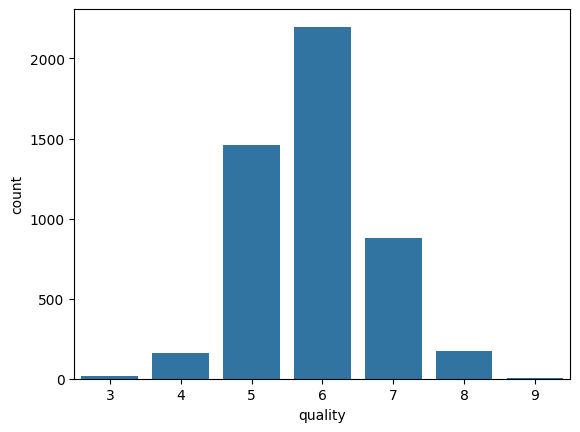

In [6]:
sns.countplot(x='quality', data=df)
plt.show()

In [7]:
X = df.drop('quality', axis=1)
y = df['quality']
X, y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36            20.7      0.045   
 1               6.3              0.30         0.34             1.6      0.049   
 2               8.1              0.28         0.40             6.9      0.050   
 3               7.2              0.23         0.32             8.5      0.058   
 4               7.2              0.23         0.32             8.5      0.058   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_test)

In [14]:
y_pred

array([7, 6, 6, 5, 7, 6, 5, 6, 6, 5, 7, 5, 7, 5, 6, 5, 4, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 6, 5, 6, 7, 6,
       5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 5, 7, 6, 5, 6, 7, 6, 7,
       6, 5, 5, 5, 5, 6, 5, 4, 6, 6, 6, 7, 7, 7, 6, 6, 7, 6, 6, 7, 5, 5,
       6, 6, 7, 5, 5, 7, 6, 7, 6, 6, 5, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6,
       5, 6, 6, 7, 6, 7, 7, 6, 5, 8, 6, 7, 6, 4, 7, 6, 7, 6, 6, 6, 6, 6,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       7, 5, 6, 6, 7, 5, 5, 5, 6, 6, 7, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5,
       5, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 7, 7, 6, 6, 5, 6, 7,
       4, 5, 7, 5, 6, 5, 5, 6, 7, 6, 6, 7, 6, 6, 6, 7, 5, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 7, 5, 7, 6, 4, 7, 6, 5, 6, 5, 5, 4,
       7, 6, 7, 5, 4, 6, 5, 5, 6, 4, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 4, 4,
       8, 6, 5, 6, 5, 5, 6, 6, 7, 8, 5, 7, 5, 5, 6, 5, 6, 6, 7, 5, 7, 7,
       8, 5, 5, 5, 6, 4, 6, 6, 8, 6, 4, 5, 6, 5, 5,

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5459183673469388
Confusion Matrix:
 [[  1   0   1   3   0   0]
 [  1   8  12   4   0   0]
 [  1  19 172  89   9   1]
 [  1  13 114 255  47   2]
 [  0   2  20  69  90  11]
 [  0   1   2  14   9   9]]
Classification Report:
               precision    recall  f1-score   support

           3       0.25      0.20      0.22         5
           4       0.19      0.32      0.24        25
           5       0.54      0.59      0.56       291
           6       0.59      0.59      0.59       432
           7       0.58      0.47      0.52       192
           8       0.39      0.26      0.31        35

    accuracy                           0.55       980
   macro avg       0.42      0.40      0.41       980
weighted avg       0.55      0.55      0.55       980



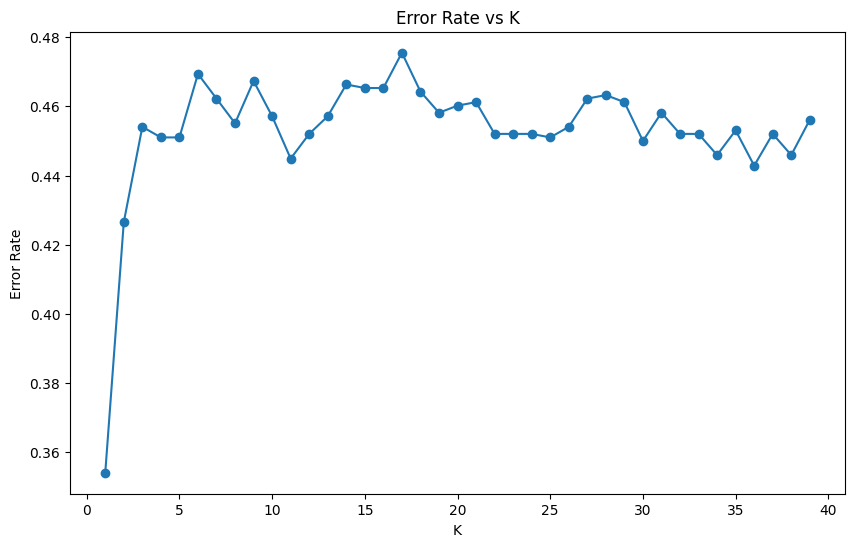

In [23]:
error_rate = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
